In [240]:
# Importing the required python modules 

import os
import numpy as np
import pandas as pd
from pandas_profiling import profile_report
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_rows',100)

from sklearn.ensemble import RandomForestRegressor
import xgboost

In [241]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [242]:
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


In [243]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


###  Data preparation

In [244]:
(train.isnull().sum()/1460)*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

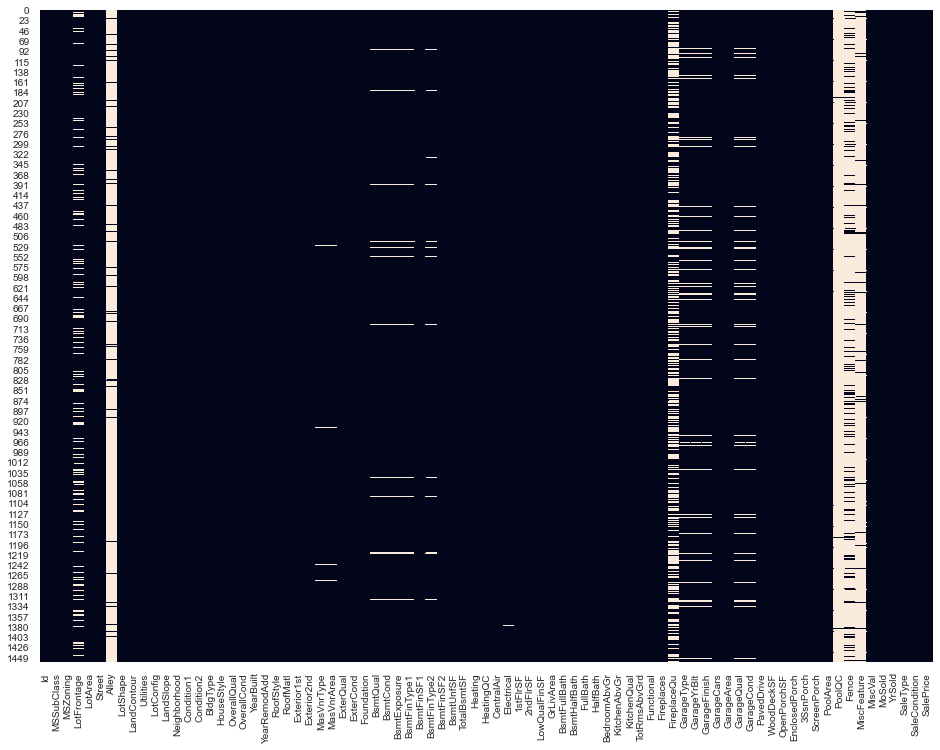

In [245]:
plt.figure(figsize=(16,12))
sns.heatmap(train.isnull() , cbar=False, linecolor='blue')

In [246]:
##  Drop the columns having more than 45% of null values

null = dict((train.isnull().sum()/1460)*100)
col = []
for var in null.keys():
    if null[var]>45:
        col.append(var)
print(col)       

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']


In [247]:
train.drop(columns=col,axis=1,inplace=True)

In [248]:
##  Replacing the missing values for remaining columns having null values
null = dict((train.isnull().sum()/1460)*100)
miss_col = []
for var in null.keys():
    if null[var]>0:
        miss_col.append(var)
print(miss_col)

['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']


In [249]:
train['LotFrontage'] = train['LotFrontage'].fillna(train['LotFrontage'].mean())

In [250]:
train['MasVnrArea'] = train['MasVnrArea'].fillna(train['MasVnrArea'].mean())

In [251]:
rem =list(set(miss_col) - {'MasVnrArea','LotFrontage'})
rem

['GarageType',
 'GarageQual',
 'MasVnrType',
 'BsmtQual',
 'Electrical',
 'BsmtFinType1',
 'BsmtFinType2',
 'GarageCond',
 'GarageFinish',
 'BsmtCond',
 'GarageYrBlt',
 'BsmtExposure']

In [252]:
## Except 'LotFrontage' and 'MasVnrArea' all are catagorical, so we replace with mode

for col in rem:
    train[col] = train[col].fillna(train[col].mode()[0])

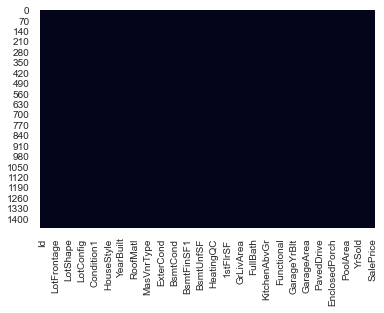

In [253]:
sns.heatmap(train.isnull() , cbar=False, linecolor='blue')

#####  Similar steps need to apply on test data

In [254]:
test.shape

(1459, 80)

In [255]:
(test.isnull().sum()/1459)*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.274160
LotFrontage      15.558602
LotArea           0.000000
Street            0.000000
Alley            92.666210
LotShape          0.000000
LandContour       0.000000
Utilities         0.137080
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.068540
Exterior2nd       0.068540
MasVnrType        1.096642
MasVnrArea        1.028101
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          3.015764
BsmtCond          3.084304
BsmtExposure      3.015764
BsmtFinType1      2.878684
BsmtFinSF1        0.068540
BsmtFinType2      2.878684
BsmtFinSF2        0.068540
B

In [256]:
##  Drop the columns having more than 45% of null values

null = dict((test.isnull().sum()/1459)*100)
col = []
for var in null.keys():
    if null[var]>45:
        col.append(var)
print(col)    

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']


In [257]:
test.drop(columns=col,axis=1,inplace=True)

In [258]:
##  Replacing the missing values for remaining columns having null values
null = dict((test.isnull().sum()/1459)*100)
miss_col = []
for var in null.keys():
    if null[var]>0:
        miss_col.append(var)
print(miss_col)

['MSZoning', 'LotFrontage', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'SaleType']


In [259]:
test[miss_col].sample(10)

,MSZoning,LotFrontage,Utilities,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,KitchenQual,Functional,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,SaleType
588,RL,72.0,AllPub,HdBoard,HdBoard,None,0.0,TA,TA,No,Unf,0.0,Unf,0.0,1728.0,1728.0,0.0,0.0,TA,Typ,Detchd,1987.0,Unf,2.0,576.0,TA,TA,WD
972,RL,70.0,AllPub,BrkFace,BrkFace,None,0.0,TA,TA,No,Rec,625.0,Unf,0.0,545.0,1170.0,0.0,1.0,TA,Typ,Attchd,1958.0,RFn,1.0,338.0,TA,TA,WD
794,RL,NaN,AllPub,VinylSd,VinylSd,None,0.0,Gd,TA,No,ALQ,871.0,Unf,0.0,52.0,923.0,1.0,0.0,TA,Typ,Attchd,2000.0,Fin,2.0,451.0,TA,TA,WD
1391,RL,90.0,AllPub,VinylSd,VinylSd,BrkFace,227.0,Gd,TA,Mn,ALQ,796.0,Unf,0.0,258.0,1054.0,0.0,1.0,Gd,Typ,Attchd,1998.0,RFn,3.0,555.0,TA,TA,WD
376,RM,86.0,AllPub,MetalSd,MetalSd,None,0.0,Gd,Fa,Av,BLQ,749.0,Rec,63.0,46.0,858.0,1.0,0.0,Gd,Min2,NaN,NaN,NaN,0.0,0.0,NaN,NaN,COD
1194,RL,120.0,AllPub,VinylSd,VinylSd,BrkFace,568.0,Ex,TA,Gd,GLQ,1505.0,Unf,0.0,363.0,1868.0,1.0,0.0,Ex,Typ,Attchd,2005.0,Fin,3.0,1085.0,TA,TA,WD
13,RL,24.0,AllPub,Plywood,Brk Cmn,None,0.0,TA,TA,No,ALQ,514.0,Unf,0.0,341.0,855.0,0.0,0.0,Gd,Typ,Attchd,1975.0,Unf,2.0,440.0,TA,TA,WD
920,RL,130.0,AllPub,HdBoard,HdBoard,BrkFace,196.0,Gd,TA,No,ALQ,910.0,Unf,0.0,385.0,1295.0,1.0,0.0,TA,Typ,Attchd,1968.0,Fin,2.0,528.0,TA,TA,WD
596,RL,63.0,AllPub,Wd Sdng,Wd Sdng,BrkFace,88.0,TA,TA,No,LwQ,531.0,Unf,0.0,505.0,1036.0,0.0,0.0,TA,Typ,Attchd,1953.0,RFn,1.0,312.0,TA,TA,WD
399,RL,64.0,AllPub,Plywood,Plywood,BrkFace,216.0,Gd,TA,Av,GLQ,1094.0,Unf,0.0,0.0,1094.0,2.0,0.0,Gd,Typ,Detchd,1979.0,Unf,2.0,672.0,TA,TA,WD


In [260]:
num_vars = ['LotFrontage','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','GarageArea']

for var in num_vars:
    test[var]=test[var].fillna(test[var].mean())

In [261]:
cat_vars = list(set(miss_col)-set(num_vars))

for var in cat_vars:
    test[var]=test[var].fillna(test[var].mode()[0])

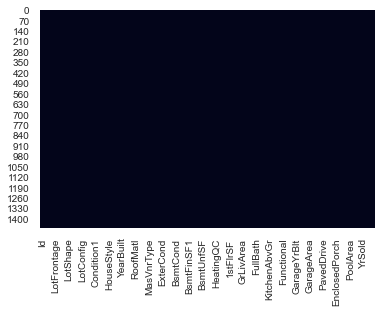

In [262]:
sns.heatmap(test.isnull() , cbar=False, linecolor='blue')

Now both train and test data sets are free of null values

In [263]:
print(train.shape)
print(test.shape)

(1460, 76)
(1459, 75)


##### Now we will combine both test and train data sets so that while creating dummies the number of columns does not changes

In [264]:
tt = pd.concat([train,test], axis=0)

In [265]:
tt.shape

(2919, 76)

In [266]:
tt.sample(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1376,1377,30,RL,52.000000,6292,Pave,Reg,Bnk,AllPub,Inside,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,5,1930,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,Gd,TA,Mn,Rec,384.0,Unf,0.0,384.0,768.0,GasA,TA,N,SBrkr,790,0,0,790,0.0,0.0,1,0,2,1,TA,4,Typ,0,Detchd,1925.0,Unf,1.0,160.0,Fa,TA,Y,0,141,0,0,0,0,0,4,2008,WD,Normal,91000.0
1304,1305,160,RM,32.000000,3363,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,2Story,7,5,2004,2004,Gable,CompShg,VinylSd,VinylSd,Stone,117.0,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,976.0,976.0,GasA,Ex,Y,SBrkr,976,732,0,1708,0.0,0.0,2,0,3,1,Gd,7,Maj1,0,Detchd,2004.0,Unf,2.0,380.0,TA,TA,Y,0,40,0,0,0,0,0,4,2006,WD,Normal,130000.0
68,69,30,RM,47.000000,4608,Pave,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Artery,Norm,1Fam,1Story,4,6,1945,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,Gd,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,747.0,747.0,GasA,TA,Y,SBrkr,747,0,0,747,0.0,0.0,1,0,2,1,TA,4,Typ,0,Attchd,1945.0,Unf,1.0,220.0,TA,TA,Y,0,0,0,0,0,0,0,6,2010,WD,Normal,80000.0
939,2400,50,RL,51.000000,3500,Pave,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Feedr,Norm,1Fam,1.5Fin,3,5,1945,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,LwQ,144.0,Unf,0.0,226.0,370.0,GasA,TA,N,FuseA,442,228,0,670,1.0,0.0,1,0,2,1,Fa,4,Typ,0,Attchd,2005.0,Unf,0.0,0.0,TA,TA,N,0,21,0,0,0,0,2000,7,2007,WD,Normal,NaN
799,800,50,RL,60.000000,7200,Pave,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Feedr,Norm,1Fam,1.5Fin,5,7,1937,1950,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,252.0,TA,TA,BrkTil,Gd,TA,No,ALQ,569.0,Unf,0.0,162.0,731.0,GasA,Ex,Y,SBrkr,981,787,0,1768,1.0,0.0,1,1,3,1,Gd,7,Typ,2,Detchd,1939.0,Unf,1.0,240.0,TA,TA,Y,0,0,264,0,0,0,0,6,2007,WD,Normal,175000.0
1225,2686,60,RL,75.000000,12447,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,RRAn,Norm,1Fam,2Story,8,5,2005,2006,Gable,CompShg,CemntBd,CmentBd,Stone,192.0,Gd,TA,PConc,Gd,Gd,No,Unf,0.0,Unf,0.0,1100.0,1100.0,GasA,Ex,Y,SBrkr,1116,848,0,1964,0.0,0.0,2,1,3,1,Gd,8,Typ,1,BuiltIn,2005.0,Fin,2.0,760.0,TA,TA,Y,200,70,0,0,0,0,0,1,2006,New,Partial,NaN
57,1518,90,RL,70.000000,8267,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Feedr,Norm,Duplex,1Story,5,5,1958,1958,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,1604.0,1604.0,GasA,TA,Y,SBrkr,1604,0,0,1604,0.0,0.0,2,0,4,2,TA,8,Typ,0,Attchd,1958.0,Unf,2.0,576.0,TA,TA,Y,42,0,0,0,0,0,0,3,2010,WD,Normal,NaN
741,742,20,RL,65.000000,6768,Pave,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Feedr,Norm,1Fam,1Story,6,8,1961,1996,Hip,CompShg,HdBoard,HdBoard,None,0.0,TA,Gd,CBlock,TA,TA,Mn,GLQ,832.0,Unf,0.0,80.0,912.0,GasA,Gd,Y,SBrkr,912,0,0,912,1.0,1.0,1,0,3,1,Gd,5,Typ,0,Detchd,1962.0,Unf,1.0,288.0,TA,TA,Y,168,0,0,0,0,0,0,5,2008,WD,Normal,142000.0
904,2365,120,FV,45.000000,4379,Pave,IR1,Lvl,AllPub,FR2,Gtl,Somerst,Norm,Norm,TwnhsE,1Story,8,5,2004,2004,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,851.0,Unf,0.0,527.0,1378.0,GasA,Ex,Y,SBrkr,1378,0,0,1378,1.0,0.0,2,0,2,1,Gd,6,Typ,1,Attchd,2004.0,Fin,2.0,540.0,TA,TA,Y,160,56,0,0,0,0,0,7,2007,WD,Normal,NaN
541,542,60,RL,70.049958,11000,Pave,Reg,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,72.0,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,969.0,969.0,GasA,Ex,Y,SBrkr,997,1288,0,2285,

In [269]:
## Finding the all catagorical features in dataset

num_var = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF',
          '2ndFlrSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','MiscVal','EnclosedPorch','3SsnPorch',
           'ScreenPorch','PoolArea','GarageYrBlt','LowQualFinSF','YearBuilt','YearRemodAdd','SalePrice','Id']

## Cat features
cat_var = list(set(tt.columns)-set(num_var))
print(cat_var)

['SaleCondition', 'Street', 'YrSold', 'HeatingQC', 'MSSubClass', 'MSZoning', 'BsmtFullBath', 'GarageCond', 'Condition1', 'GarageFinish', 'Exterior1st', 'LotShape', 'BsmtCond', 'ExterCond', 'TotRmsAbvGrd', 'Foundation', 'HalfBath', 'BsmtExposure', 'ExterQual', 'Exterior2nd', 'Heating', 'GarageQual', 'PavedDrive', 'BsmtFinType1', 'BldgType', 'OverallQual', 'MoSold', 'Fireplaces', 'LandContour', 'MasVnrType', 'Electrical', 'OverallCond', 'BsmtFinType2', 'GarageCars', 'Neighborhood', 'KitchenQual', 'LotConfig', 'HouseStyle', 'RoofMatl', 'Utilities', 'CentralAir', 'Condition2', 'GarageType', 'LandSlope', 'BsmtQual', 'BsmtHalfBath', 'Functional', 'FullBath', 'RoofStyle', 'SaleType', 'BedroomAbvGr', 'KitchenAbvGr']


In [270]:
##  Creating function to get dummies for all catagorical features

def getdummies(df,col):
    for var in col:
        print(var)
        dummy = pd.get_dummies(df[var],prefix=var, drop_first=True)
        df.drop(columns=var, axis=1,inplace=True)
        df = pd.concat([df,dummy],axis=1)
    return df

In [271]:
tt = getdummies(tt,cat_var)

SaleCondition
Street
YrSold
HeatingQC
MSSubClass
MSZoning
BsmtFullBath
GarageCond
Condition1
GarageFinish
Exterior1st
LotShape
BsmtCond
ExterCond
TotRmsAbvGrd
Foundation
HalfBath
BsmtExposure
ExterQual
Exterior2nd
Heating
GarageQual
PavedDrive
BsmtFinType1
BldgType
OverallQual
MoSold
Fireplaces
LandContour
MasVnrType
Electrical
OverallCond
BsmtFinType2
GarageCars
Neighborhood
KitchenQual
LotConfig
HouseStyle
RoofMatl
Utilities
CentralAir
Condition2
GarageType
LandSlope
BsmtQual
BsmtHalfBath
Functional
FullBath
RoofStyle
SaleType
BedroomAbvGr
KitchenAbvGr


In [275]:
tt.shape

(2919, 310)

### Model bulding 

In [279]:
train = tt[tt.Id<1461]
test = tt[tt.Id>1460]

In [280]:
train.drop(columns='Id' ,axis=1, inplace=True)
test.drop(columns=['Id','SalePrice'] ,axis=1, inplace=True)

C:\Users\admin\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [281]:
print(train.shape)
print(test.shape)

(1460, 309)
(1459, 308)


In [282]:
train_X = train[train.columns.difference(['SalePrice'])]
train_y = train['SalePrice']

In [283]:
regressor = xgboost.XGBRFRegressor()
regressor.fit(train_X,train_y)

XGBRFRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bytree=1, gamma=0, gpu_id=-1, importance_type='gain',
               interaction_constraints='', max_delta_step=0, max_depth=6,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=100, n_jobs=0, num_parallel_tree=100,
               objective='reg:squarederror', random_state=0, reg_alpha=0,
               scale_pos_weight=1, tree_method='exact', validate_parameters=1,
               verbosity=None)

In [284]:
import pickle
filename = 'final_model.pkl'
pickle.dump(regressor,open(filename,'wb'))

In [286]:
# Aligning the columns 
test = test[train_X.columns]

In [287]:
pred_y = regressor.predict(test)

In [288]:
pred_y

array([126390.12, 150419.16, 182412.12, ..., 149705.8 , 117946.27,
       260345.39], dtype=float32)

In [290]:
## Creating Submission file
pred = pd.DataFrame(pred_y)
sub_df = pd.read_csv('sample_submission.csv')
dataset = pd.concat([sub_df['Id'],pred],axis=1)
dataset.columns = ['Id','SalePrice']
dataset.to_csv('sample_submission.csv',index=False)

In [293]:
import sip